#Breve Expliacion

En este cuaderno se arman los archivos de texto plano necesarios para poder trabajar con las imágenes pertenecientes al DS MURA. Para cada imagen se guarda el path y la clase a la que pertenece con el objetivo de armar posteriormente una clase denominada "otros", la cual debe poseer una cantidad similar de imágenes pertenecientes a cada clase que la componen. 

A su vez, se realiza un análisis exploratorio de MURA.

#Montaje e Importación

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino

/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino


In [3]:
import pandas as pd
import numpy as np
import os
from skimage.io import imread
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split 

# Revisamos los CSV 
Estos vinieron con la base de datos MURA. Vemos que información tenemos disponible y armamos un DF apto para la tarea que deseamos realizar. 

In [ ]:
head = ['Path']

In [ ]:
df_train_IP = pd.read_csv('MURA-v1.1/train_image_paths.csv', names=head)
df_test_IP = pd.read_csv('MURA-v1.1/valid_image_paths.csv', names=head)
df_train_IP

,Path
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...
1,MURA-v1.1/train/XR_SHOULDER/patient00001/study...
2,MURA-v1.1/train/XR_SHOULDER/patient00001/study...
3,MURA-v1.1/train/XR_SHOULDER/patient00002/study...
4,MURA-v1.1/train/XR_SHOULDER/patient00002/study...
...,...
36803,MURA-v1.1/train/XR_HAND/patient11183/study1_ne...
36804,MURA-v1.1/train/XR_HAND/patient11183/study1_ne...
36805,MURA-v1.1/train/XR_HAND/patient11184/study1_ne...
36806,MURA-v1.1/train/XR_HAND/patient11184/study1_ne...


In [ ]:
classes = ['SHOULDER','HAND','ELBOW','FINGER','FOREARM','HUMERUS','WRIST']

In [ ]:
df_train_IP.to_numpy()[1]

array(['MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/image3.png'],
      dtype=object)

In [ ]:
index = 14000
start = str(df_train_IP.to_numpy()[index]).find('_')
stop = str(df_train_IP.to_numpy()[index]).find('/',start+1)
str(df_train_IP.to_numpy()[index])[start+1:stop]

'FINGER'

In [ ]:
imgTypes = []
for row in range(len(df_train_IP)):
  start = str(df_train_IP.to_numpy()[row]).find('_')
  stop = str(df_train_IP.to_numpy()[row]).find('/',start+1)
  imgTypes.append(str(df_train_IP.to_numpy()[row])[start+1:stop])
print(imgTypes)

imgTypes_test = []
for row in range(len(df_test_IP)):
  start = str(df_test_IP.to_numpy()[row]).find('_')
  stop = str(df_test_IP.to_numpy()[row]).find('/',start+1)
  imgTypes_test.append(str(df_test_IP.to_numpy()[row])[start+1:stop])
print(imgTypes_test)

['SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SHOULDER', 'SH

In [ ]:
df_train_IP["ImgType"] = imgTypes
df_test_IP["ImgType"] = imgTypes_test

In [ ]:
df_train_IP

,Path,ImgType
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,SHOULDER
1,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,SHOULDER
2,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,SHOULDER
3,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,SHOULDER
4,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,SHOULDER
...,...,...
36803,MURA-v1.1/train/XR_HAND/patient11183/study1_ne...,HAND
36804,MURA-v1.1/train/XR_HAND/patient11183/study1_ne...,HAND
36805,MURA-v1.1/train/XR_HAND/patient11184/study1_ne...,HAND
36806,MURA-v1.1/train/XR_HAND/patient11184/study1_ne...,HAND


In [ ]:
df_test_IP

,Path,ImgType
0,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,WRIST
1,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,WRIST
2,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,WRIST
3,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,WRIST
4,MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...,WRIST
...,...,...
3192,MURA-v1.1/valid/XR_FINGER/patient11967/study1_...,FINGER
3193,MURA-v1.1/valid/XR_FINGER/patient11967/study1_...,FINGER
3194,MURA-v1.1/valid/XR_FINGER/patient11738/study1_...,FINGER
3195,MURA-v1.1/valid/XR_FINGER/patient11738/study1_...,FINGER


In [ ]:
df_train_IP.to_excel("train_MURA.xlsx")
df_test_IP.to_excel("test_MURA.xlsx")

# Análisis del DS 
Las proporciones tanto en train como en test de cada clase se mantienen aproximadamente constantes, por lo tanto, nos quedamos con este split. 

In [4]:
df_train_IP = pd.read_excel('/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/train_MURA.xlsx')
df_test_IP = pd.read_excel('/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/test_MURA.xlsx')

In [ ]:
df_test_IP.groupby(df_test_IP['ImgType']).count()

,Path
ImgType,
ELBOW,465
FINGER,461
FOREARM,301
HAND,460
HUMERUS,288
SHOULDER,563
WRIST,659


In [ ]:
df_test_IP.groupby(df_test_IP['ImgType']).count()/len(df_test_IP)

,Path
ImgType,
ELBOW,0.145449
FINGER,0.144198
FOREARM,0.094151
HAND,0.143885
HUMERUS,0.090084
SHOULDER,0.176103
WRIST,0.206131


In [ ]:
df_train_IP.groupby(df_train_IP['ImgType']).count()

,Path
ImgType,
ELBOW,4931
FINGER,5106
FOREARM,1825
HAND,5543
HUMERUS,1272
SHOULDER,8379
WRIST,9752


In [ ]:
df_train_IP.groupby(df_train_IP['ImgType']).count()/len(df_train_IP)

,Path
ImgType,
ELBOW,0.133965
FINGER,0.138720
FOREARM,0.049582
HAND,0.150592
HUMERUS,0.034558
SHOULDER,0.227641
WRIST,0.264942


In [5]:
ELBOW = df_train_IP[df_train_IP['ImgType']=='ELBOW']['Path'].values[0]
FINGER = df_train_IP[df_train_IP['ImgType']=='FINGER']['Path'].values[0]
FOREARM = df_train_IP[df_train_IP['ImgType']=='FOREARM']['Path'].values[0]
HAND = df_train_IP[df_train_IP['ImgType']=='HAND']['Path'].values[0]
HUMERUS = df_train_IP[df_train_IP['ImgType']=='HUMERUS']['Path'].values[0]
SHOULDER = df_train_IP[df_train_IP['ImgType']=='SHOULDER']['Path'].values[0]
WRIST = df_train_IP[df_train_IP['ImgType']=='WRIST']['Path'].values[0]
IMG_ELB = imread(str(ELBOW))
IMG_FINGER = imread(str(FINGER))
IMG_FOREARM = imread(str(FOREARM))
IMG_HAND = imread(str(HAND))
IMG_HUMERUS = imread(str(HUMERUS))
IMG_WRIST = imread(str(WRIST))
IMG_SHOULDER = imread(str(SHOULDER))

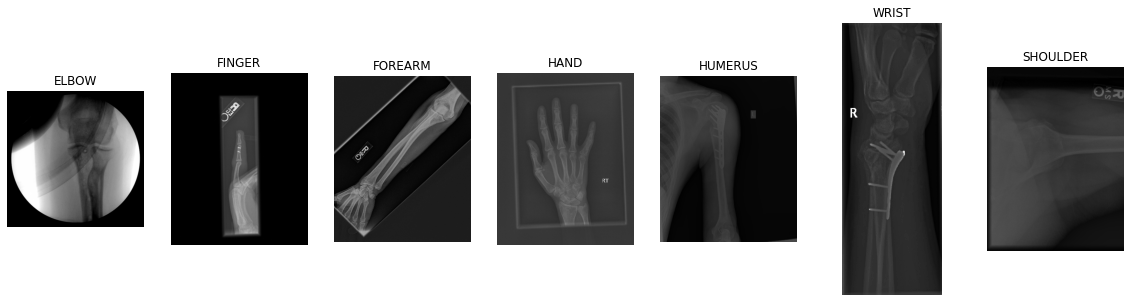

In [6]:
fig,axs=plt.subplots(1,7,figsize=(20,5))
axs[0].imshow(IMG_ELB,cmap='gray')
axs[0].set_title('ELBOW')
axs[1].imshow(IMG_FINGER,cmap='gray')
axs[1].set_title('FINGER')
axs[2].imshow(IMG_FOREARM,cmap='gray')
axs[2].set_title('FOREARM')
axs[3].imshow(IMG_HAND,cmap='gray')
axs[3].set_title('HAND')
axs[4].imshow(IMG_HUMERUS,cmap='gray')
axs[4].set_title('HUMERUS')
axs[5].imshow(IMG_WRIST,cmap='gray')
axs[5].set_title('WRIST')
axs[6].imshow(IMG_SHOULDER,cmap='gray')
axs[6].set_title('SHOULDER')
axs[0].set_axis_off()
axs[1].set_axis_off()
axs[2].set_axis_off()
axs[3].set_axis_off()
axs[4].set_axis_off()
axs[5].set_axis_off()
axs[6].set_axis_off()

In [ ]:
print(np.shape(IMG_ELB))
print(np.shape(IMG_WRIST))
print(np.shape(IMG_HAND))
print(np.shape(IMG_HUMERUS))
print(np.shape(IMG_SHOULDER))
print(np.shape(IMG_FOREARM))
print(np.shape(IMG_FINGER))

(512, 512)
(512, 188)
(512, 406, 3)
(512, 420, 3)
(512, 380, 3)
(512, 420, 3)
(512, 406, 3)
